#Car Fuel Efficiency Predication

##loading the data

In [20]:
import pandas as pd
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

In [21]:
##suppose the header of the dataset is missing then we use this as name of the data set
columns = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']
df = pd.read_csv(url,delim_whitespace = True,names = columns, na_values= '?')


<ipython-input-21-498f568dc7a7>:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url,delim_whitespace = True,names = columns, na_values= '?')


In [22]:
print(df.head())

      MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
18.0    8      307.0         130.0      3504.0    12.0            70   
15.0    8      350.0         165.0      3693.0    11.5            70   
18.0    8      318.0         150.0      3436.0    11.0            70   
16.0    8      304.0         150.0      3433.0    12.0            70   
17.0    8      302.0         140.0      3449.0    10.5            70   

      Model Year                     Origin  
18.0           1  chevrolet chevelle malibu  
15.0           1          buick skylark 320  
18.0           1         plymouth satellite  
16.0           1              amc rebel sst  
17.0           1                ford torino  


In [23]:
print(df.isnull().sum())

MPG             0
Cylinders       0
Displacement    6
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64


In [24]:
print(df.describe())

              MPG   Cylinders  Displacement   Horsepower      Weight  \
count  398.000000  398.000000    392.000000   398.000000  398.000000   
mean     5.454774  193.425879    104.469388  2970.424623   15.568090   
std      1.701004  104.269838     38.491160   846.841774    2.757689   
min      3.000000   68.000000     46.000000  1613.000000    8.000000   
25%      4.000000  104.250000     75.000000  2223.750000   13.825000   
50%      4.000000  148.500000     93.500000  2803.500000   15.500000   
75%      8.000000  262.000000    126.000000  3608.000000   17.175000   
max      8.000000  455.000000    230.000000  5140.000000   24.800000   

       Acceleration  Model Year  
count    398.000000  398.000000  
mean      76.010050    1.572864  
std        3.697627    0.802055  
min       70.000000    1.000000  
25%       73.000000    1.000000  
50%       76.000000    1.000000  
75%       79.000000    2.000000  
max       82.000000    3.000000  


##data preprocessing

In [25]:
df = df.dropna()

In [26]:
print(df.columns)

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'Origin'],
      dtype='object')


In [27]:
#encoding the categoriacal variable
df = pd.get_dummies(df,columns = ["Origin"], drop_first = True)

## feature selection since we need MPG for pediction

In [34]:
df = df.dropna()
X = df.drop('MPG',axis = 1)

y = df['MPG']

##train test and split the data

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

##train the regression model

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
model = LinearRegression()

In [38]:
print(X_train.isnull().sum())

Cylinders                      0
Displacement                   0
Horsepower                     0
Weight                         0
Acceleration                   0
                              ..
Origin_vw dasher (diesel)      0
Origin_vw pickup               0
Origin_vw rabbit               0
Origin_vw rabbit c (diesel)    0
Origin_vw rabbit custom        0
Length: 306, dtype: int64


In [39]:
X_train = X_train.dropna()

In [40]:
print(X_train.isnull().sum())

Cylinders                      0
Displacement                   0
Horsepower                     0
Weight                         0
Acceleration                   0
                              ..
Origin_vw dasher (diesel)      0
Origin_vw pickup               0
Origin_vw rabbit               0
Origin_vw rabbit c (diesel)    0
Origin_vw rabbit custom        0
Length: 306, dtype: int64


In [41]:
model.fit(X_train,y_train)

LinearRegression()

In [43]:
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_})
print(coefficients)

                         Feature   Coefficient
0                      Cylinders  6.245727e-03
1                   Displacement -6.334304e-03
2                     Horsepower  5.178350e-04
3                         Weight -8.680939e-02
4                   Acceleration -1.927521e-02
..                           ...           ...
301    Origin_vw dasher (diesel) -2.163671e-01
302             Origin_vw pickup -2.220446e-15
303             Origin_vw rabbit -7.713505e-01
304  Origin_vw rabbit c (diesel) -2.605272e-01
305      Origin_vw rabbit custom -7.134464e-01

[306 rows x 2 columns]


##evaluate the model

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predict test set results
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 0.7006764934131013
Root Mean Squared Error (RMSE): 0.8370642110454259
Mean Absolute Error (MAE): 0.599763264813442
R-squared (R²): 0.7648208026572462


##visualize the result

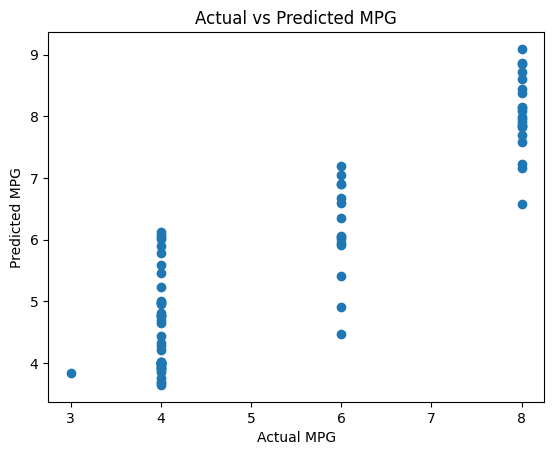

In [45]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Actual vs Predicted MPG")
plt.show()

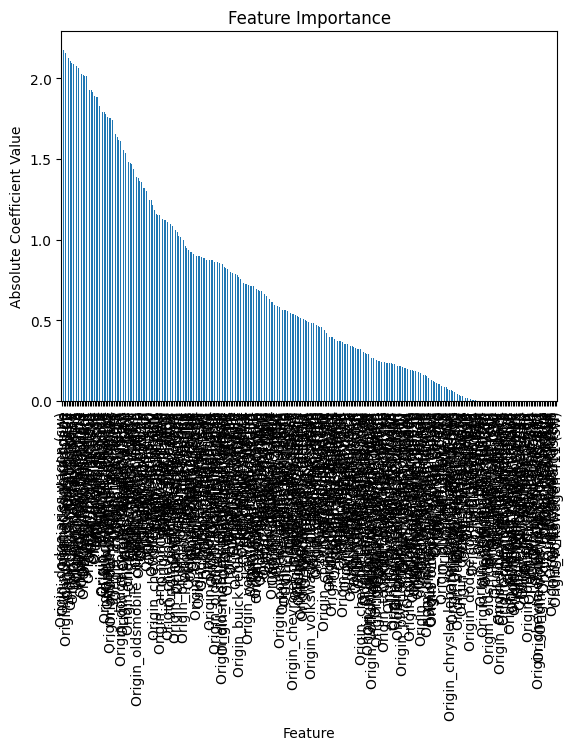

In [46]:
coefficients['Importance'] = coefficients['Coefficient'].abs()
coefficients.sort_values(by='Importance', ascending=False, inplace=True)

coefficients.plot(kind='bar', x='Feature', y='Importance', legend=False)
plt.title("Feature Importance")
plt.ylabel("Absolute Coefficient Value")
plt.show()
